Saving 20221003-00000053-dal-000-6-view.jpg to 20221003-00000053-dal-000-6-view.jpg


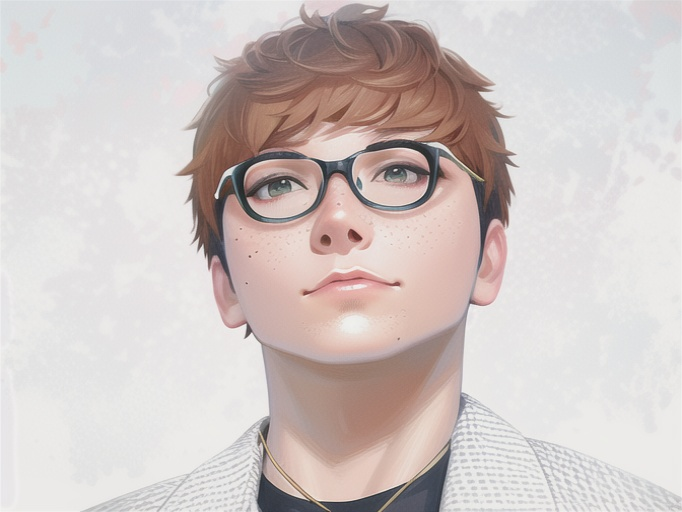

In [7]:
from google.colab import files
from IPython.display import Image
import requests
import base64
import json

uploaded = files.upload()

filename = list(uploaded.keys())[0]

with open("{}".format(filename), "rb") as f:
    image = f.read()
    image_64_encode = base64.b64encode(image).decode('utf-8')

ss = json.dumps(
{
    "parameter": {
        "rsp_media_type": "jpg",
    },
    "extra": {},
    "media_info_list": [{
        "media_data": image_64_encode,
        "media_profiles": {
            "media_data_type":"jpg"
        },
        "media_extra": {
        }
    }]

}
)

AIBeauty_url = "https://openapi.mtlab.meitu.com/v1/stable_diffusion_anime?api_key=237d6363213c4751ba1775aba648517d&api_secret=b7b1c5865a83461ea5865da3ecc7c03d"
response = requests.post(AIBeauty_url, data=ss)

afterfilename = "{}_ai.{}".format(*filename.split("."))

with open(afterfilename, "wb") as f:
    f.write(base64.b64decode(response.json()["media_info_list"][0]["media_data"]))
    
Image(afterfilename)